# Question 1

___


Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use ```from keras.datasets import fashion_mnist``` for getting the fashion mnist dataset.


In [1]:
! pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [2]:
import wandb

In [3]:
wandb.login(key='208eb9fbdf5d2187fde3a83cdf51d2c458066577')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

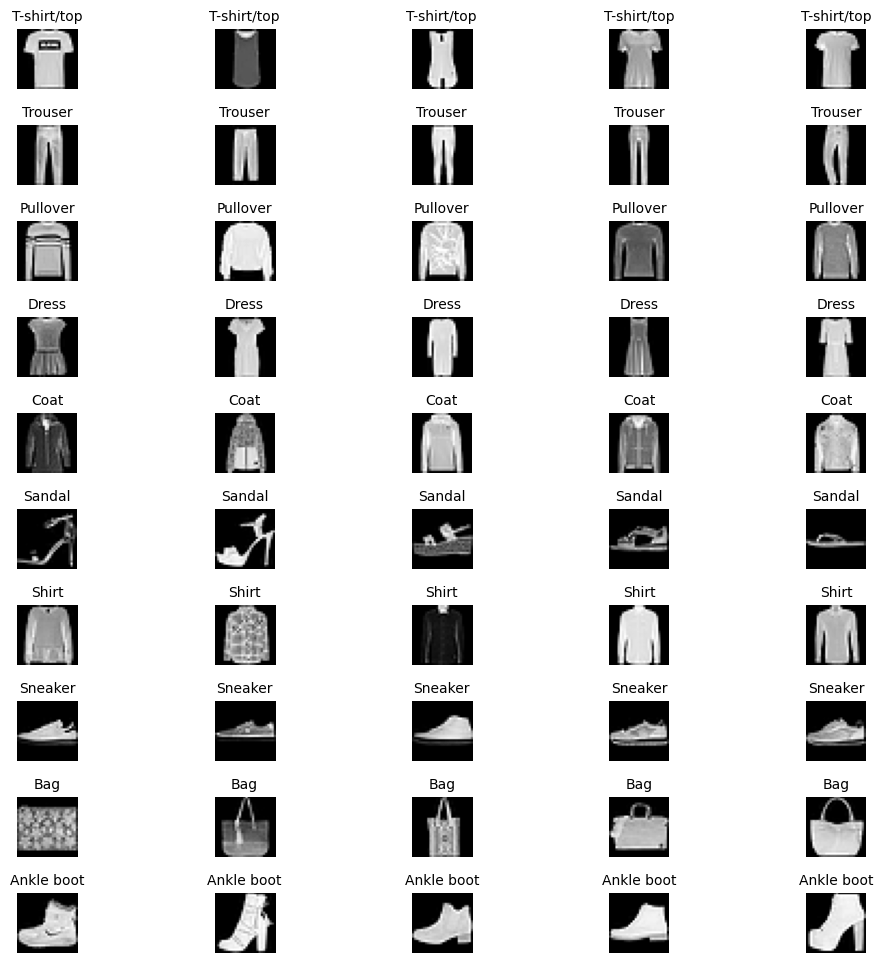

In [9]:
import numpy as np
import wandb
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Initialize Wandb
wandb.init(project='CS6910 Assignment 1', entity='dibakar', name='Question_1')

# Store the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class labels
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

class_num = 10
grid_size = 5

# Create a grid to store images
fig, axs = plt.subplots(class_num, grid_size, figsize=(12, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Iterate through each class
for i in range(class_num):
    idx = np.where(y_train == i)[0]  # Indices of images belonging to the current class
    grid_size = min(len(idx), grid_size)  # Adjust grid_size to fit available images

    # Display up to grid_size images for this class
    for j, image_idx in enumerate(idx[:grid_size]):
        axs[i, j].imshow(x_train[image_idx], cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(class_labels[y_train[image_idx]], fontsize=10)

# Log the grid of images to Wandb
wandb.log({"Examples": [wandb.Image(plt)]})

plt.show()
